In [1]:
pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv('/content/Admission_Predict.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.shape

(400, 9)

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [29]:
correlation_matrix= data.corr()
correlation_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


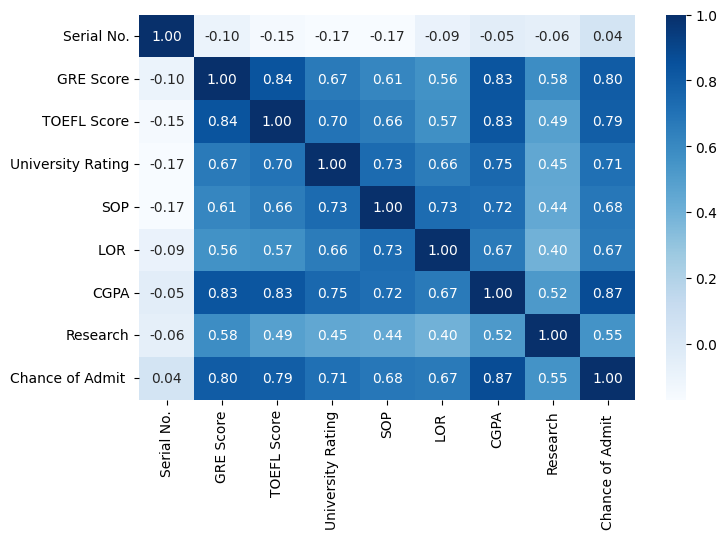

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt='.2f')
plt.show()

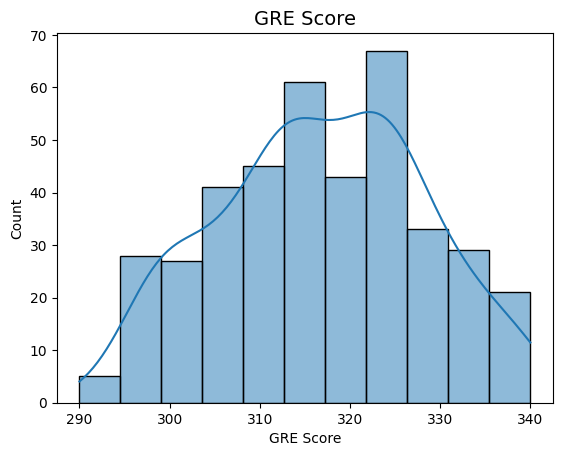

In [31]:
sns.histplot(data["GRE Score"], kde=True)
plt.title("GRE Score", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Count")
plt.show()

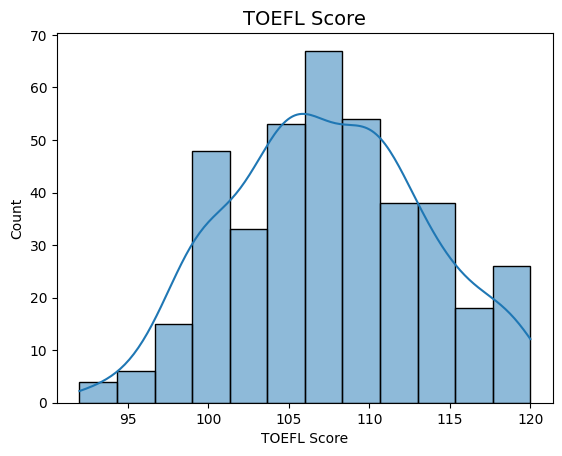

In [33]:
sns.histplot(data["TOEFL Score"], kde=True)
plt.title("TOEFL Score", fontsize=14)
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()

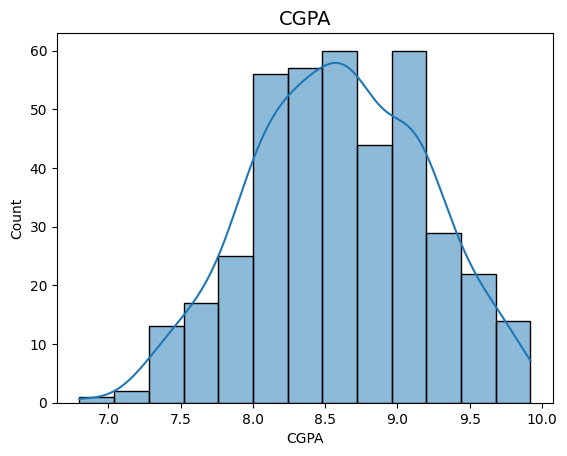

In [34]:
sns.histplot(data["CGPA"], kde=True)
plt.title("CGPA", fontsize=14)
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()

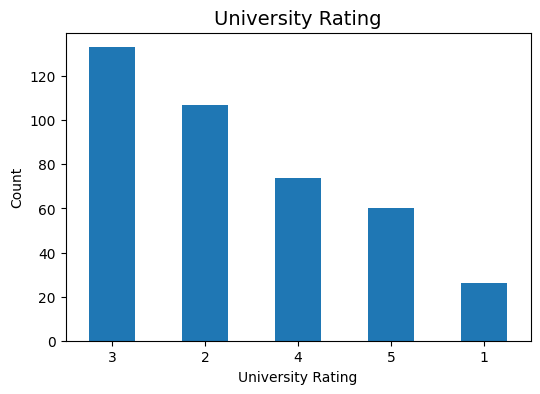

In [35]:
data["University Rating"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("University Rating", fontsize=14)
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

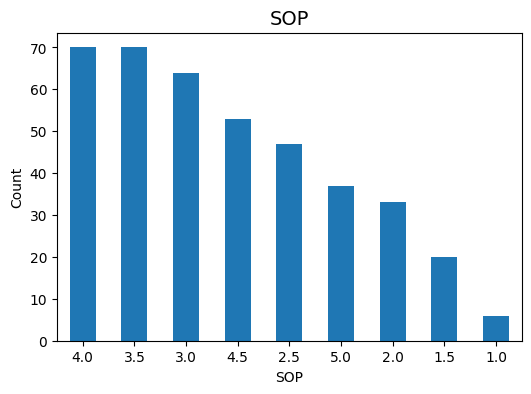

In [36]:
data["SOP"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("SOP", fontsize=14)
plt.xlabel("SOP")
plt.ylabel("Count")
plt.show()

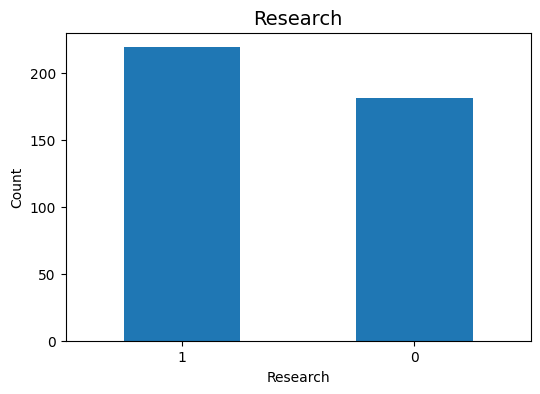

In [37]:
data["Research"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("Research", fontsize=14)
plt.xlabel("Research")
plt.ylabel("Count")
plt.show()

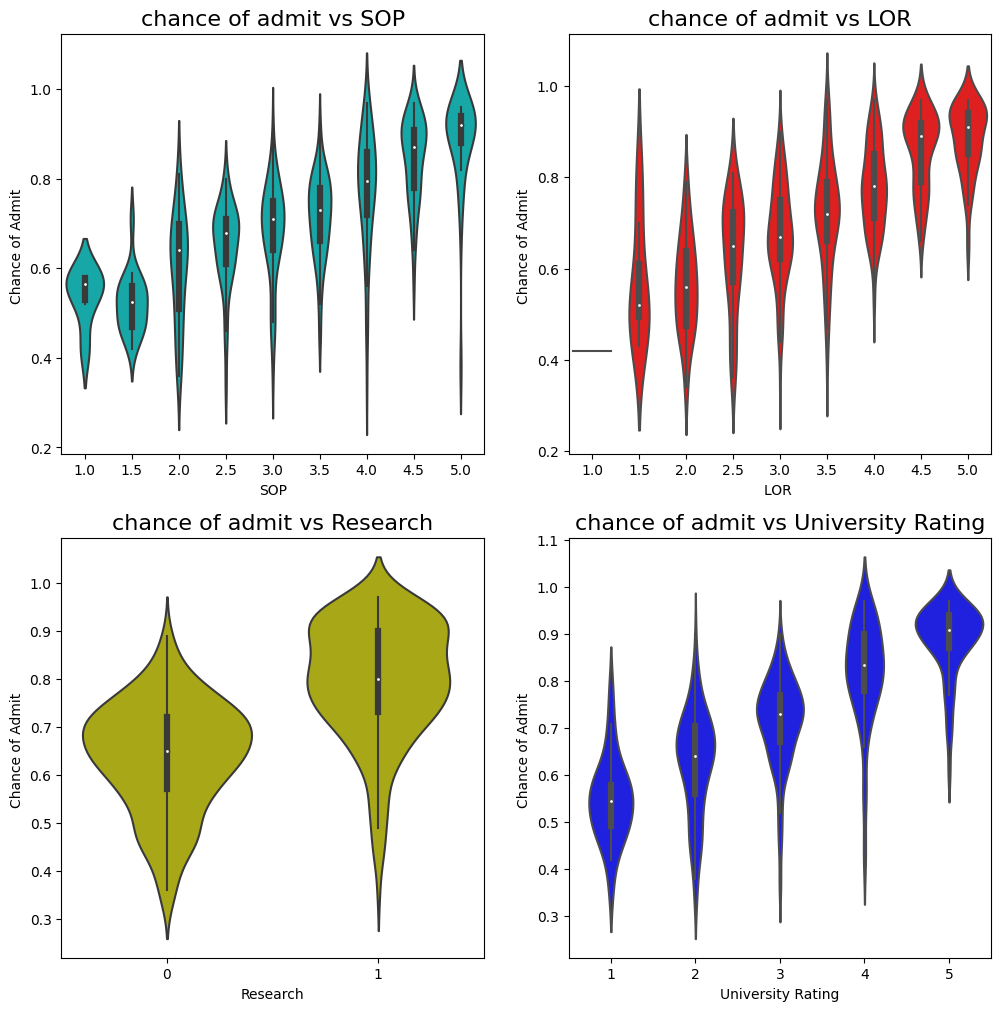

In [39]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(221)
sns.violinplot(data=data, x='SOP', y='Chance of Admit ', hue=None, color='c', ax=ax)
ax.set_title('chance of admit vs SOP', fontsize=16)

ax = fig.add_subplot(222)
sns.violinplot(data=data, x='LOR ', y='Chance of Admit ', hue=None, color='r', ax=ax)
ax.set_title('chance of admit vs LOR', fontsize=16)

ax = fig.add_subplot(223)
sns.violinplot(data=data, x='Research', y='Chance of Admit ', hue=None, color='y', ax=ax)
ax.set_title('chance of admit vs Research', fontsize=16)

ax = fig.add_subplot(224)
sns.violinplot(data=data, x='University Rating', y='Chance of Admit ', hue=None, color='b', ax=ax)
ax.set_title('chance of admit vs University Rating', fontsize=16)

plt.show()

<Figure size 500x500 with 0 Axes>

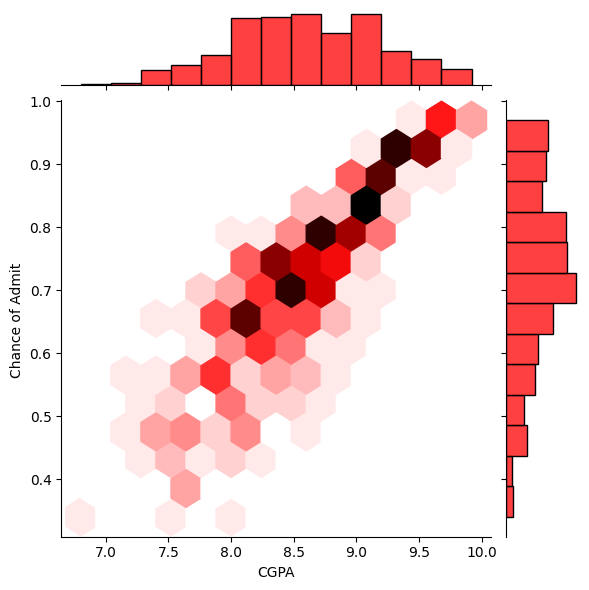

In [41]:
plt.figure(figsize=(5,5))
sns.jointplot(x='CGPA', y='Chance of Admit ', data=data, kind="hex", color="r")
plt.show()

<Figure size 500x500 with 0 Axes>

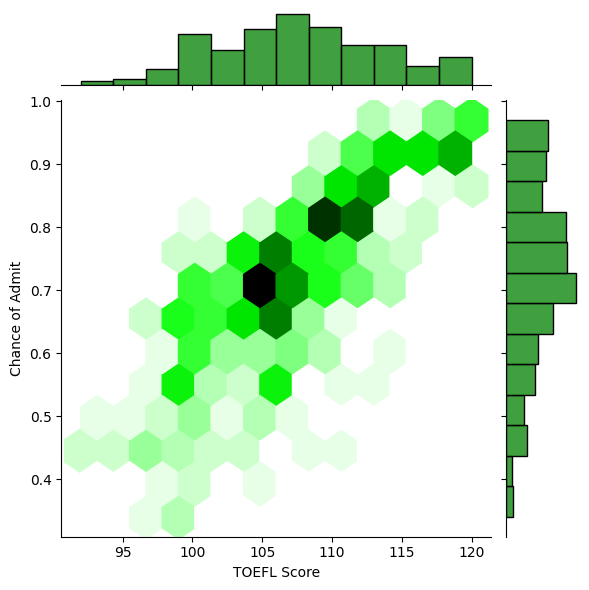

In [44]:
fig=plt.figure(figsize=(5,5))
data.columns = data.columns.str.strip()
sns.jointplot(x='TOEFL Score', y='Chance of Admit', data=data, kind="hex", color="g")
plt.show()

<Figure size 500x500 with 0 Axes>

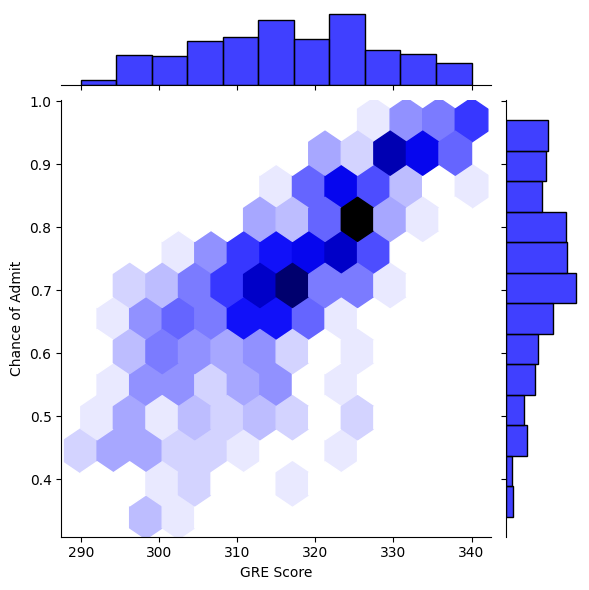

In [46]:
plt.figure(figsize=(5,5))
data.columns = data.columns.str.strip()
sns.jointplot(x=data.iloc[:, 1], y=data.iloc[:, -1], kind="hex", color="b")
plt.show()

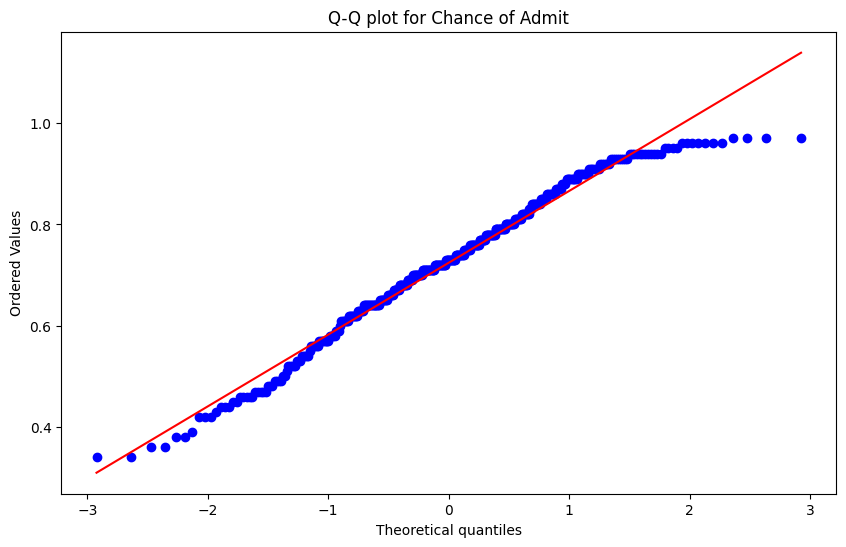

In [47]:
plt.figure(figsize=(10,6))
stats.probplot(data["Chance of Admit"], plot= plt, dist="norm")
plt.title('Q-Q plot for Chance of Admit')
plt.show()

In [12]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [19]:
threshold = 0.5
y = (y > threshold).astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.97
ROC-AUC Score: 0.80
